In [15]:
def allInOne(path):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    def filterArraysToShortest(arr1, arr1Pos, arr2, arr2Pos):
        both_pos = np.logical_and(arr1Pos, arr2Pos)
        arr1Filt = arr1[both_pos] 
        arr2Filt = arr2[both_pos] 
    
        return arr1Filt, arr2Filt
    
    df = pd.read_csv(path)
    display(df.head(5))
    
    reps = df['rep'].to_numpy()
    hopsRanked = df['hopsRanked'].to_numpy()
    hopsUnranked = df['hopsUnranked'].to_numpy()
    hopsRankedOne = df['hopsRankedOne'].to_numpy()
    hopsPath = df['hopsPath'].to_numpy()

    hopsRankedPositive = hopsRanked > -1
    hopsUnrankedPositive = hopsUnranked > -1
    hopsRankedOnePositive = hopsRankedOne > -1
    hopsPathPositive = hopsPath > -1
    
    total = len(df.index)

    successesRanked = np.count_nonzero(hopsRanked > -1)
    successesRankedOne = np.count_nonzero(hopsRankedOne > -1)
    successesUnranked = np.count_nonzero(hopsUnranked > -1)
    successesPath = np.count_nonzero(hopsPath > -1)

    print("Resilience Paths: {}%".format((successesPath / total) * 100))
    print("Resilience One Tree: {}%".format((successesRankedOne / total) * 100))
    print("Resilience Trees: {}%".format((successesRanked / total) * 100))
    #print("Resilience Unranked: {}%".format((successesUnranked / total) * 100))

  
    hopsPathFiltered,hopsRankedFiltered = filterArraysToShortest(hopsPath, hopsPathPositive, hopsRanked, hopsRankedPositive)   
    
    diff = np.subtract(hopsPathFiltered,hopsRankedFiltered)
    plt.scatter(np.arange(len(hopsPathFiltered)), diff, color="blue", s=1.5)
    plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    print("Trees beat paths in {} runs".format(higherZero))
    print("Paths beat trees in {} runs".format(lowerZero))
    print("Both performed equally good in {} runs".format(equalZero))
    

    hopsPathFiltered,hopsRankedOneFiltered = filterArraysToShortest(hopsPath, hopsPathPositive, hopsRankedOne, hopsRankedOnePositive)   

    diff = np.subtract(hopsPathFiltered,hopsRankedOneFiltered)
    plt.scatter(np.arange(len(hopsPathFiltered)), diff, color="blue", s=1.5);
    plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    print("One Tree beat paths in {} runs".format(higherZero))
    print("Paths beat one tree in {} runs".format(lowerZero))
    print("Both performed equally good in {} runs".format(equalZero))




    hopsRankedOneFiltered,hopsRankedFiltered = filterArraysToShortest(hopsRankedOne, hopsRankedOnePositive, hopsRanked, hopsRankedPositive)   

    diff = np.subtract(hopsRankedOneFiltered,hopsRankedFiltered)
    plt.scatter(np.arange(len(hopsRankedFiltered)), diff, color="blue", s=1.5);
    plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    print("Multiple Trees beat One Tree in {} runs".format(higherZero))
    print("One Tree beat  multiple trees in {} runs".format(lowerZero))
    print("Both performed equally good in {} runs".format(equalZero))




    hopsUnrankedFiltered,hopsRankedFiltered = filterArraysToShortest(hopsUnranked, hopsUnrankedPositive, hopsRanked, hopsRankedPositive)   

    diff = np.subtract(hopsUnrankedFiltered,hopsRankedFiltered)
    plt.scatter(np.arange(len(hopsRankedFiltered)), diff, color="blue", s=1.5);
    plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    print("Ranked Trees beat Unranked Tree in {} runs".format(higherZero))
    print("Unranked Tree beat ranked trees in {} runs".format(lowerZero))
    print("Both performed equally good in {} runs".format(equalZero))

## clustered - shortest

,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,100,236,0.05,3,2,clustered,0.5;-0.15,9,9,5,4,8,7,2,7,7,2,4,shortest
1,999,100,230,0.05,3,2,clustered,0.5;-0.15,-1,-1,5,-6,0,-1,-6,-1,-1,-6,0,shortest
2,998,100,266,0.05,8,7,clustered,0.5;-0.15,2,2,2,0,0,2,0,2,2,0,0,shortest
3,996,100,269,0.05,3,2,clustered,0.5;-0.15,4,4,4,0,0,14,10,14,14,10,0,shortest
4,995,100,251,0.05,5,4,clustered,0.5;-0.15,5,5,4,1,10,-1,-5,-1,-1,-5,4,shortest


Resilience Paths: 38.642297650130544%
Resilience One Tree: 45.43080939947781%
Resilience Trees: 67.36292428198433%


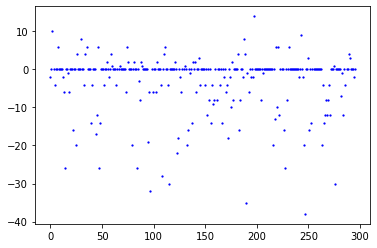

Trees beat paths in 37 runs
Paths beat trees in 98 runs
Both performed equally good in 161 runs


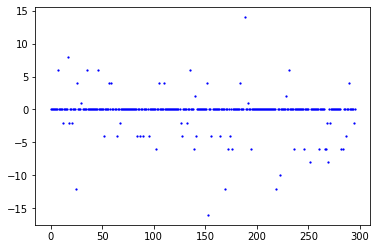

One Tree beat paths in 19 runs
Paths beat one tree in 40 runs
Both performed equally good in 237 runs


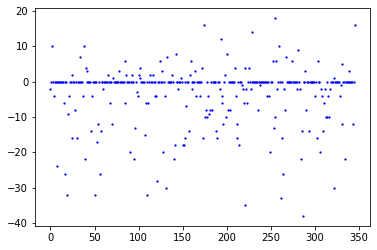

Multiple Trees beat One Tree in 48 runs
One Tree beat  multiple trees in 117 runs
Both performed equally good in 181 runs


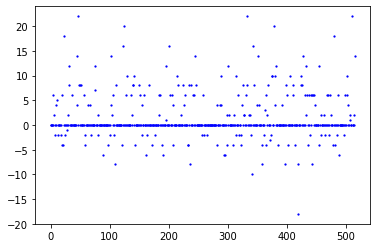

Ranked Trees beat Unranked Tree in 135 runs
Unranked Tree beat ranked trees in 67 runs
Both performed equally good in 314 runs


In [16]:
allInOne("CSVs/shortestVSavg/trees-2021-07-25_15-41-07-p0.05-n100.csv")

## clustered - avg

,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,100,248,0.05,5,4,clustered,0.5;-0.15,19,19,5,14,16,-1,-6,-1,-1,-6,6,average
1,999,100,248,0.05,4,3,clustered,0.5;-0.15,4,22,4,0,0,10,6,10,10,6,0,average
2,998,100,241,0.05,3,2,clustered,0.5;-0.15,5,5,5,0,0,5,0,5,5,0,0,average
3,997,100,263,0.05,6,5,clustered,0.5;-0.15,14,6,5,9,4,-1,-6,-1,-1,-6,2,average
4,995,100,240,0.05,5,4,clustered,0.5;-0.15,26,34,6,20,0,-1,-7,-1,-1,-7,0,average


Resilience Paths: 36.46258503401361%
Resilience One Tree: 43.26530612244898%
Resilience Trees: 65.98639455782312%


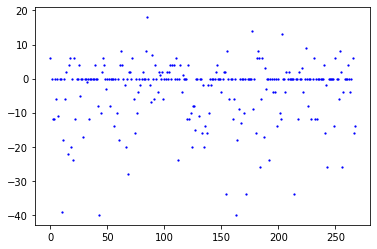

Trees beat paths in 57 runs
Paths beat trees in 95 runs
Both performed equally good in 116 runs


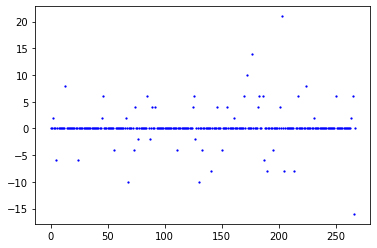

One Tree beat paths in 28 runs
Paths beat one tree in 19 runs
Both performed equally good in 221 runs


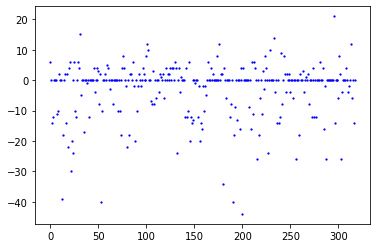

Multiple Trees beat One Tree in 80 runs
One Tree beat  multiple trees in 104 runs
Both performed equally good in 134 runs


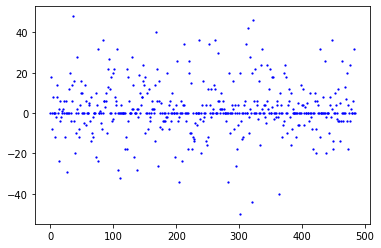

Ranked Trees beat Unranked Tree in 192 runs
Unranked Tree beat ranked trees in 130 runs
Both performed equally good in 163 runs


In [17]:
allInOne("CSVs/shortestVSavg/trees-2021-07-25_15-39-35-p0.05-n100.csv")

## clustered - edgeCount

,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,999,100,252,0.05,5,4,clustered,0.5;-0.15,-1,-1,6,-7,0,-1,-7,-1,-1,-7,0,edgeCount
1,996,100,254,0.05,7,6,clustered,0.5;-0.15,18,10,4,14,0,6,2,10,10,6,0,edgeCount
2,992,100,247,0.05,2,1,clustered,0.5;-0.15,-1,-1,7,-8,16,-1,-8,-1,-1,-8,8,edgeCount
3,991,100,245,0.05,5,4,clustered,0.5;-0.15,-1,-1,5,-6,4,-1,-6,-1,-1,-6,2,edgeCount
4,990,100,237,0.05,2,1,clustered,0.5;-0.15,9,5,4,5,0,10,6,10,10,6,0,edgeCount


Resilience Paths: 38.46153846153847%
Resilience One Tree: 44.230769230769226%
Resilience Trees: 64.42307692307693%


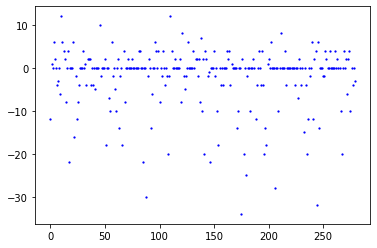

Trees beat paths in 70 runs
Paths beat trees in 90 runs
Both performed equally good in 120 runs


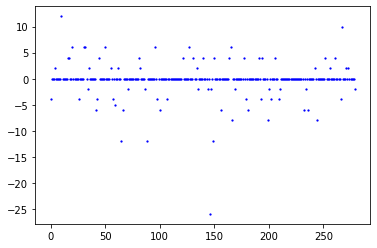

One Tree beat paths in 34 runs
Paths beat one tree in 37 runs
Both performed equally good in 209 runs


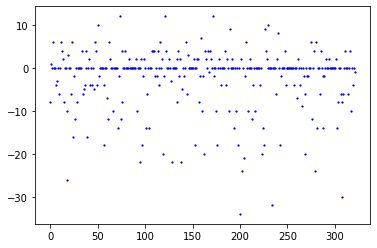

Multiple Trees beat One Tree in 71 runs
One Tree beat  multiple trees in 109 runs
Both performed equally good in 142 runs


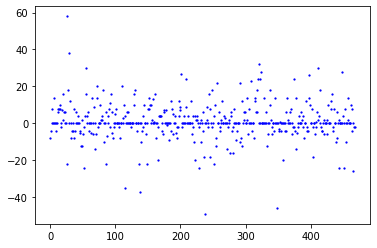

Ranked Trees beat Unranked Tree in 170 runs
Unranked Tree beat ranked trees in 132 runs
Both performed equally good in 167 runs


In [18]:
allInOne("CSVs/shortestVSavg/trees-2021-07-25_15-57-55-p0.05-n100.csv")

## done: Abarbeiten der Pfade / Bäume, welche Reihenfolge?

## done: Ausfälle um D mit prozetualem Abfall

## TODO: Topology Zoo

## Laufzeit: in ms

## TODO: Resilience

## (TODO: Schlecht angebundenes S?)